# O que analisar?

- Utilizar as variáveis: fare (tarifa paga), pclass (classe social), age (idade) e survived (variável que se quer prever)
- Tratar essas variáveis utilizando o PySpark (passar para maiúsculo)
- Fazer uma breve análise exploratória dos dados, entendendo as variáveis que estão sendo trabalhadas (plotar histograma, etc)
- Testar um modelo de árvore de decisão
- Verificar se as classes estão balanceadas
- Qual a variável mais importante?
- Avaliar o resultado através do matriz de confusão e das métricas: recall, precisão, acurácia e F1-SCore

In [0]:
import numpy as np 
import itertools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import random
import sys
%matplotlib inline 
from pyspark.sql import functions as fn

# import pydotplus
from IPython.display import Image

In [0]:
titanic_data = sns.load_dataset('titanic').dropna()

In [0]:
df_spark = spark.createDataFrame(titanic_data)

In [0]:
display(df_spark)

survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,female,38.0,1,0,71.2833,C,First,woman,false,C,Cherbourg,yes,false
1,1,female,35.0,1,0,53.1,S,First,woman,false,C,Southampton,yes,false
0,1,male,54.0,0,0,51.8625,S,First,man,true,E,Southampton,no,true
1,3,female,4.0,1,1,16.7,S,Third,child,false,G,Southampton,yes,false
1,1,female,58.0,0,0,26.55,S,First,woman,false,C,Southampton,yes,true
1,2,male,34.0,0,0,13.0,S,Second,man,true,D,Southampton,yes,true
1,1,male,28.0,0,0,35.5,S,First,man,true,A,Southampton,yes,true
0,1,male,19.0,3,2,263.0,S,First,man,true,C,Southampton,no,false
1,1,female,49.0,1,0,76.7292,C,First,woman,false,D,Cherbourg,yes,false
0,1,male,65.0,0,1,61.9792,C,First,man,true,B,Cherbourg,no,false


In [0]:
df_spark_corrigido = (
    df_spark
    .select(
        'SURVIVED',
        'AGE',
        'FARE',
        'PCLASS'
    )
)

display(df_spark_corrigido)

SURVIVED,AGE,FARE,PCLASS
1,38.0,71.2833,1
1,35.0,53.1,1
0,54.0,51.8625,1
1,4.0,16.7,3
1,58.0,26.55,1
1,34.0,13.0,2
1,28.0,35.5,1
0,19.0,263.0,1
1,49.0,76.7292,1
0,65.0,61.9792,1


In [0]:
df_spark_corrigido = (
    df_spark_corrigido
    .select(
        # fn, auxilia qdo precisa realizar algum tratamento de colunas em SPARK
        fn.col('SURVIVED').cast('double'),
        fn.col('AGE').cast('double'), # transformar para valores numericos
        fn.col('FARE').cast('double'), # transformar para valores numericos
        fn.col('PCLASS').cast('double'), # transformar para valores numericos
    )
)

In [0]:
df_titanic_pd = df_spark_corrigido.toPandas()
df_titanic_pd.head()

,SURVIVED,AGE,FARE,PCLASS
0,1.0,38.0,71.2833,1.0
1,1.0,35.0,53.1000,1.0
2,0.0,54.0,51.8625,1.0
3,1.0,4.0,16.7000,3.0
4,1.0,58.0,26.5500,1.0


### Analise Exploratória
* Fazer uma breve análise exploratória dos dados, entendendo as variáveis que estão sendo trabalhadas (plotar histograma, etc)

In [0]:
df_titanic_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SURVIVED  182 non-null    float64
 1   AGE       182 non-null    float64
 2   FARE      182 non-null    float64
 3   PCLASS    182 non-null    float64
dtypes: float64(4)
memory usage: 5.8 KB


Out[10]: <AxesSubplot:>

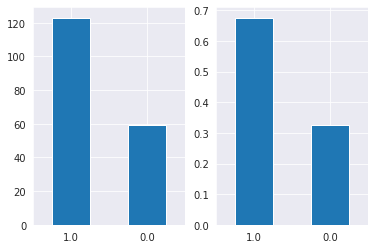

In [0]:
fig, axs = plt.subplots(nrows=1, ncols=2)

df_titanic_pd.SURVIVED.value_counts().plot(kind='bar', rot=0, ax=axs[0])
df_titanic_pd.SURVIVED.value_counts(normalize=True).plot(kind='bar', rot=0, ax=axs[1])

### ARVORE DE DECISAO
* Testar um modelo de árvore de decisão

In [0]:
# BALANCEANDO DADOS
df_vivo = df_titanic_pd[df_titanic_pd['SURVIVED'] == 1]
df_rip = df_titanic_pd[df_titanic_pd['SURVIVED'] == 0]

In [0]:
# VIVO 123 | RIP 59
df_bal = pd.concat([
    df_rip,
    df_vivo.sample(n=len(df_rip))], axis=0
)

* Verificar se as classes estão balanceadas

Out[13]: <AxesSubplot:>

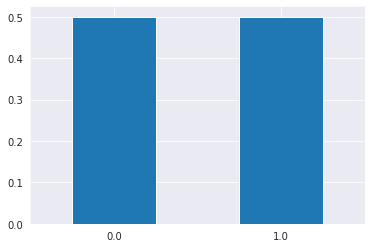

In [0]:
# CHECANDO SE DIVIDIMOS CORRETAMENTE A BASE
df_bal.SURVIVED.value_counts(normalize=True).plot(kind='bar', rot=0)

In [0]:
# Y = RESULTADO DA PREVISAO
Y = df_bal['SURVIVED'].values # trabsformamos em valores para virar um vetor (matriz) - requisicao da decision tree

# X = O QUE VAMOS USAR PARA PREVER
X = df_bal[['AGE','FARE','PCLASS']].values

In [0]:
# DIVIDINDO BASE TREINO E TESTE
np.random.seed(1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [0]:
# CONFIGURANDO HIPERPARAMETROS DA ARVORE DE DECISAO
dtree = DecisionTreeClassifier(
    splitter = 'best',
    criterion = 'entropy',
    max_depth = None,
    random_state = 0
)

In [0]:
# TREINANDO O MODELO
modelo = dtree.fit(X_train, Y_train)

* Qual a variável mais importante?

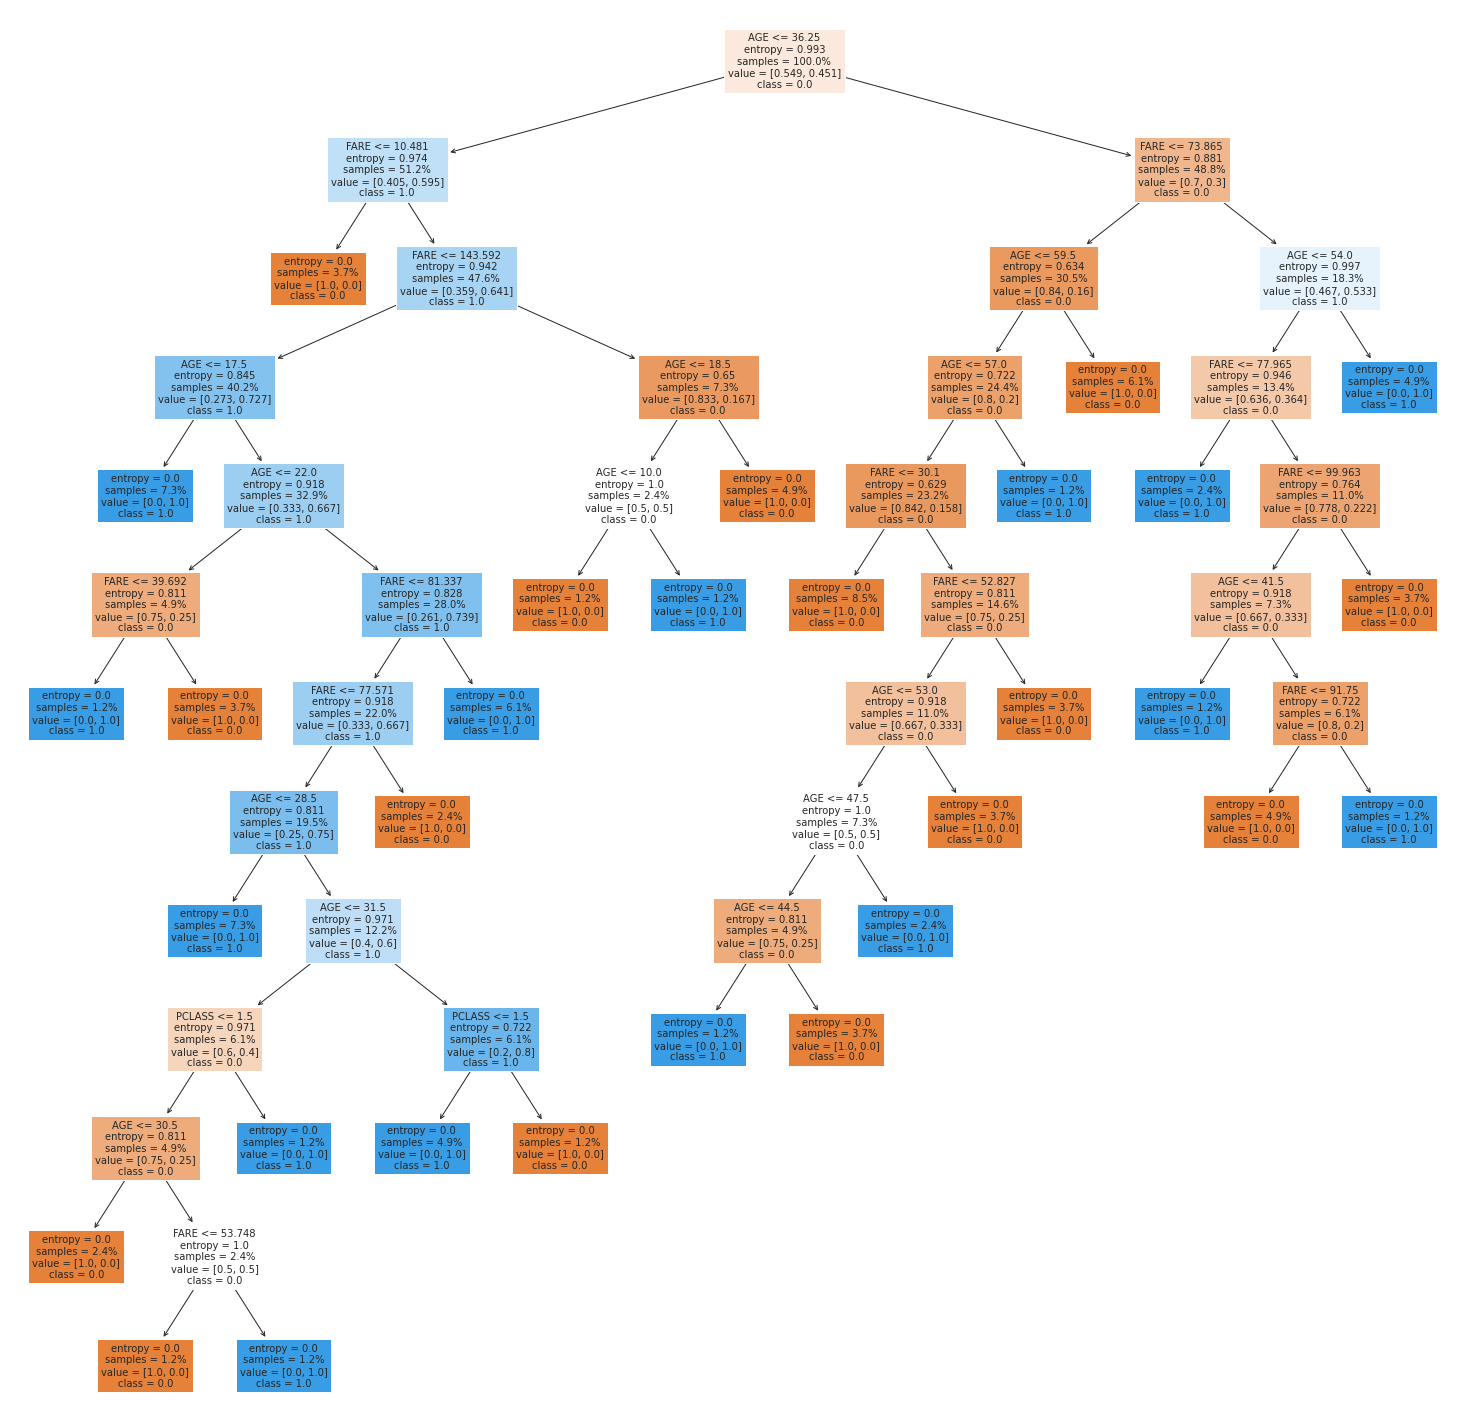

In [0]:
features_names = ['AGE','FARE','PCLASS']
nome_classes   = modelo.classes_

# Converter os nomes das características e classes em strings
nome_classes = [str(i) for i in nome_classes]

fig = plt.figure(figsize=(26,26))

plot_tree(modelo,
          class_names = nome_classes,
          feature_names = features_names, 
          proportion=True, fontsize=10, impurity=True, filled=True      
         )

plt.show()

Feature ranking:
1. feature 0 (0.481044)
2. feature 1 (0.454866)
3. feature 2 (0.064091)


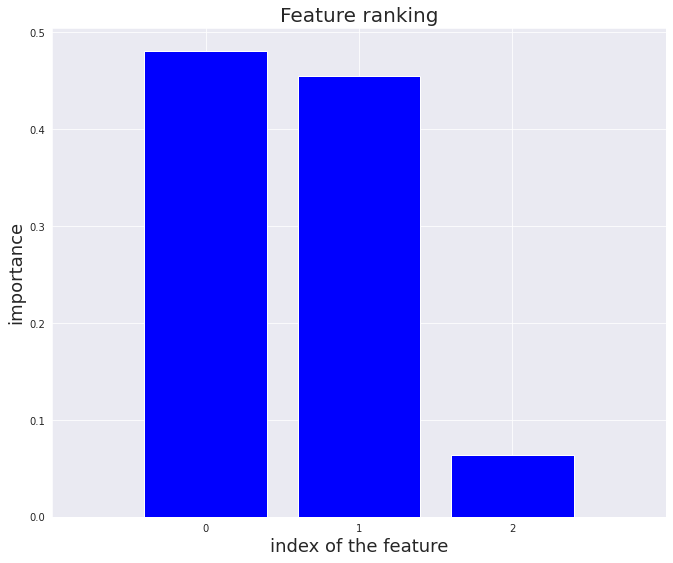

In [0]:
importances = modelo.feature_importances_
 
indices = np.argsort(importances)[::-1]
 
print("Feature ranking:")
 
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
f, ax = plt.subplots(figsize=(11, 9))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(X.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)
plt.show()

In [0]:
for f in range(len(features_names)):
    print("%d. feature %s (%f)" % (f + 1, features_names[indices[f]], importances[indices[f]]))


1. feature AGE (0.481044)
2. feature FARE (0.454866)
3. feature PCLASS (0.064091)


### TESTES

Matriz de Confusão sem normalizacão 
[[ 9  5]
 [ 8 14]]


<command-2622224163234679>:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


Out[21]: ''<Figure size 432x288 with 0 Axes>

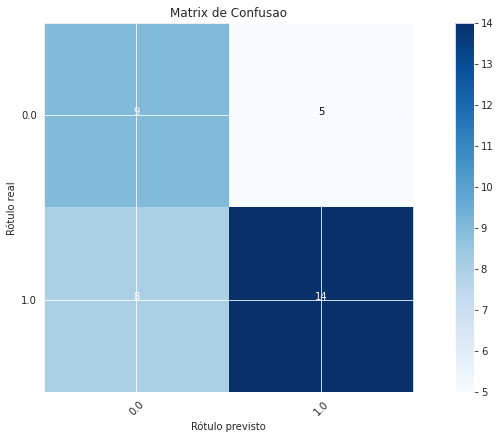

In [0]:
Y_predict = modelo.predict(X_test)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusão Normalizada")
    else:
        print('Matriz de Confusão sem normalizacão ')
        
        print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('Rótulo real')
    plt.xlabel('Rótulo previsto')

matrix_confusao = confusion_matrix(Y_test, Y_predict)

plt.figure()

fig = plt.figure(figsize=(12,6))

plot_confusion_matrix(matrix_confusao, 
                      classes=nome_classes,
                      title='Matrix de Confusao'
                     )
;

In [0]:
# Transforma POSITIVO para 1 e NEGATIVO para 0
y_test_corrigido = np.where(Y_test == 1, 1, 0)
y_predito_corrigido = np.where(Y_predict == 1, 1, 0)

In [0]:
print(f'RECALL da Árvore: {round(recall_score(y_test_corrigido, y_predito_corrigido), 2)}')
print(f'F1 da Árvore: {round(f1_score(y_test_corrigido, y_predito_corrigido), 2)}')
print(f'Precisão da Árvore: {round(precision_score(y_test_corrigido, y_predito_corrigido), 2)}')
print(f'Acurácia da Árvore: {round(accuracy_score(y_test_corrigido, y_predito_corrigido), 2)}')

RECALL da Árvore: 0.64
F1 da Árvore: 0.68
Precisão da Árvore: 0.74
Acurácia da Árvore: 0.64


### AVALIANDO OVERFITTING

In [0]:
arvores_prof = []

for max_depth in range(1, 15):
    arvore_prof = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=max_depth)
    arvore_prof.fit(X_train, Y_train)
    arvores_prof.append(arvore_prof)

In [0]:
teste_profundidade = [i.max_depth for i in arvores_prof]
teste_nos = [i.tree_.node_count for i in arvores_prof]

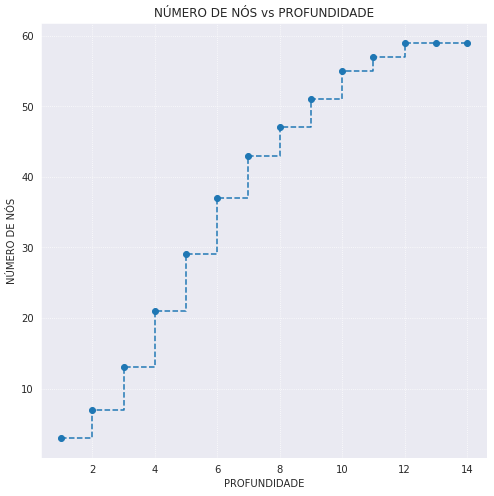

In [0]:
fig, ax = plt.subplots( figsize=(8, 8))
 
ax.plot(teste_profundidade, teste_nos, marker="o", drawstyle="steps-post", linestyle='--')
ax.set_xlabel("PROFUNDIDADE")
ax.set_ylabel("NÚMERO DE NÓS")
ax.set_title("NÚMERO DE NÓS vs PROFUNDIDADE")
plt.grid(linestyle=':')

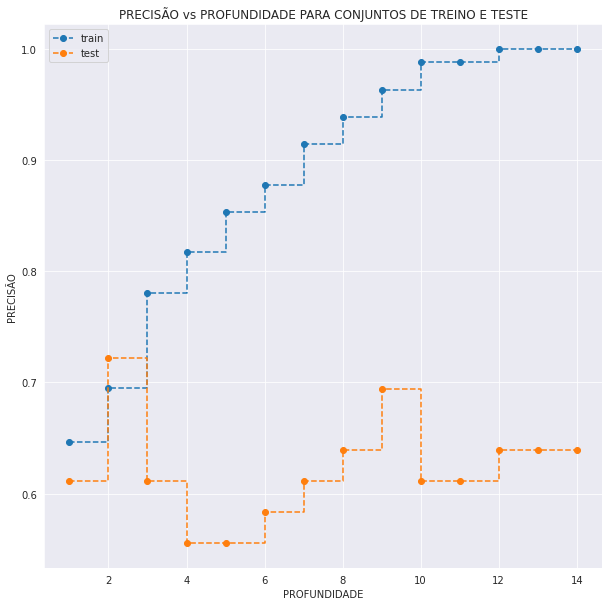

In [0]:
train_scores_prof = [modelo.score(X_train, Y_train) for modelo in arvores_prof]
test_scores_prof = [modelo.score(X_test, Y_test) for modelo in arvores_prof]
 
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel("PROFUNDIDADE")
ax.set_ylabel("PRECISÃO")
ax.set_title("PRECISÃO vs PROFUNDIDADE PARA CONJUNTOS DE TREINO E TESTE")
ax.plot(teste_profundidade, train_scores_prof, marker="o", label="train", drawstyle="steps-post", linestyle='--')
ax.plot(teste_profundidade, test_scores_prof, marker="o", label="test", drawstyle="steps-post", linestyle='--')
 
ax.legend()
plt.show()